# paper: FRB 220208aaaa

In [1]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
import numpy as np

%matplotlib inline 

importing Jupyter notebook from BurstFit_paper_template.ipynb


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


In [2]:
# input variables 
candidate = '220208aaaa'
datestring = '2022_2_8_19_42_51'
beam = 59
corr = 'corr01'
dm_heimdall = 440.7
width_heimdall = 16  
snr_heimdall = 13.8

voltage = True
dedisperse = False 
fil_file = '/home/ubuntu/vikram/scratch/' + candidate + '.fil'
mask_chans=[] 
nfreq = 4 
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))

2022-06-08 08:15:35,872 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-08 08:15:35,928 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-08 08:15:35,930 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-08 08:15:36,002 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (40.0362016495391, 18.406354763558262)


using filterbank  /data/dsa110/T1/corr01/2022_2_8_19_42_51/fil_220208aaaa/220208aaaa_59.fil


2022-06-08 08:15:36,027 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-08 08:15:39,870 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-08 08:15:39,872 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-08 08:15:40,371 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (44.21507524096354, 31.54924060576162)


using filterbank  /home/ubuntu/vikram/scratch/220208aaaa.fil
/home/ubuntu/vikram/scratch/220208aaaa.fil 3.2768e-05 0.000262144


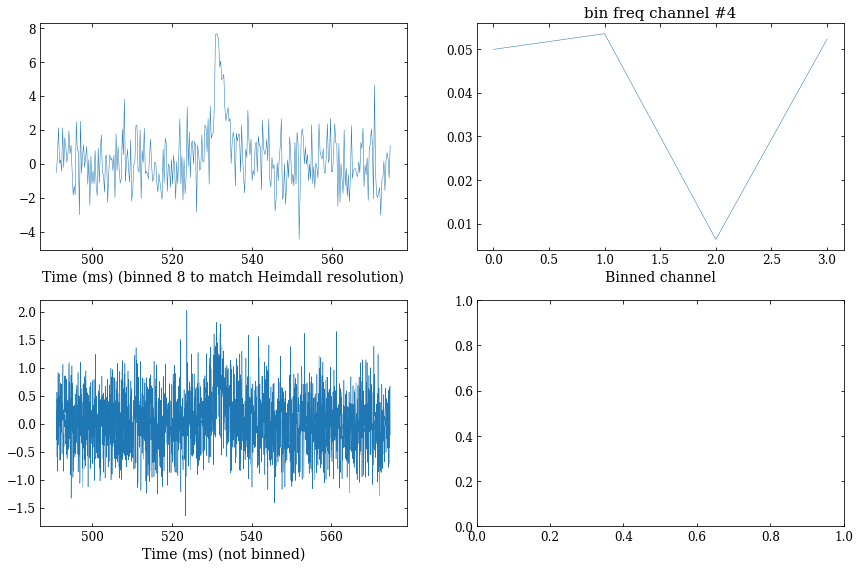

In [6]:
bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=False)

bd, fil_file  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=True)


print(fil_file, bd.tsamp, bd_heimdall.tsamp)
data_burst = paper_fit.prepare_burst_data(fil_file, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = voltage,
                                t_chop_center_s=0.5, t_chop_width = 5 * width_heimdall, 
                               dedisperse=dedisperse, nfreq = nfreq)

## S1: Spectrum--  4 channels, normalized
## T1: Time profile-- Gaussian 
## T2: Time profile-- Gaussian + scattering
## cx: x-components in time profile 

### No scattering

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 08:16:06,851 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:16:06,853 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:16:06,857 - tests -root - INFO - P values: T-test (0.81041), Kruskal (0.94616), KS (0.83160), F-test (0.44065)
2022-06-08 08:16:06,858 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 08:16:06,861 - tests -root - INFO - P values: T-test (0.00002), Kruskal (0.00002), KS (0.00013), F-test (0.28142)
2022-06-08 08:16:06,865 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 08:16:06,869 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00001), KS (0.00004), F-test (0.33382)
2022-06-08 08:16:06,870 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 08:16:06,872 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 08:16:06,874 - initial_profi

2022-06-08 08:16:07,360 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:16:07,368 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f9e1b67a400>
[0.37392277 0.45709962 0.312407   0.08706393]


2022-06-08 08:16:07,380 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:16:07,384 - initial_spectrafit -burstfit.fit - INFO - c0: 0.37392276525497437 +- 0.0
2022-06-08 08:16:07,387 - initial_spectrafit -burstfit.fit - INFO - c1: 0.4570996165275574 +- 0.0
2022-06-08 08:16:07,389 - initial_spectrafit -burstfit.fit - INFO - c2: 0.312406986951828 +- 0.0


2022-06-08 08:16:07,616 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 08:16:07,621 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.37392277, 0.45709962, 0.312407, 380.3408154305203, 1249.8353297946367, 47.450213907914986, 440.7]
2022-06-08 08:16:07,695 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:16:07,698 - sgram_fit -burstfit.fit - INFO - c0: 0.38246994661065525 +- 0.03620138881361764
2022-06-08 08:16:07,699 - sgram_fit -burstfit.fit - INFO - c1: 0.4429665167754573 +- 0.029158578075088475
2022-06-08 08:16:07,701 - sgram_fit -burstfit.fit - INFO - c2: 0.29111363772944254 +- 0.029356265007328054
2022-06-08 08:16:07,702 - sgram_fit -burstfit.fit - INFO - S: 348.73878588295145 +- 8.092425797527625
2022-06-08 08:16:07,703 - sgram_fit -burstfit.fit - INFO - mu_t: 1266.3848316125302 +- 5.885421374396948
2022-06-08 08:16:07,705 - sgram_fit -burstfit.fit - INFO - sigma_t: 49.375143395526344 +- 1.58

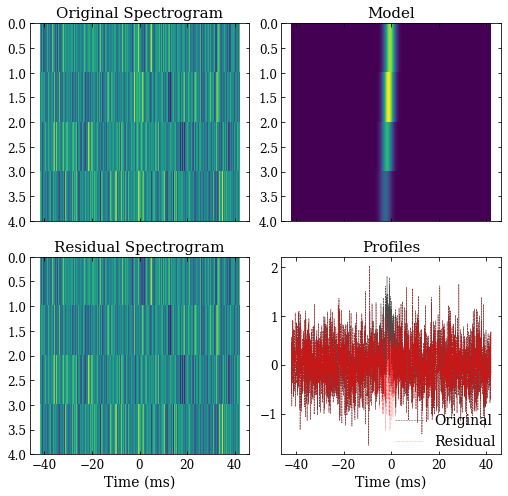

2022-06-08 08:16:08,300 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:08,302 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:16:08,305 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:16:08,306 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:16:08,308 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:08,310 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:16:08,314 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0217240519520716
2022-06-08 08:16:08,315 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 08:16:08,317 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-08 08:16:08,319 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 1.0217240519520716


In [8]:
bf_S1T1_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 1000, 0),(np.inf, 1500, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 08:16:16,047 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:16:16,049 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:16:16,053 - tests -root - INFO - P values: T-test (0.81041), Kruskal (0.94616), KS (0.83160), F-test (0.44065)
2022-06-08 08:16:16,054 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 08:16:16,057 - tests -root - INFO - P values: T-test (0.00002), Kruskal (0.00002), KS (0.00013), F-test (0.28142)
2022-06-08 08:16:16,062 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 08:16:16,066 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00001), KS (0.00004), F-test (0.33382)
2022-06-08 08:16:16,067 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 08:16:16,069 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 08:16:16,071 - initial_profi

2022-06-08 08:16:16,400 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:16:16,403 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f9e1b67a400>
[0.37392277 0.45709962 0.312407   0.08706393]


2022-06-08 08:16:16,410 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:16:16,412 - initial_spectrafit -burstfit.fit - INFO - c0: 0.37392276525497437 +- 0.0
2022-06-08 08:16:16,413 - initial_spectrafit -burstfit.fit - INFO - c1: 0.4570996165275574 +- 0.0
2022-06-08 08:16:16,414 - initial_spectrafit -burstfit.fit - INFO - c2: 0.312406986951828 +- 0.0


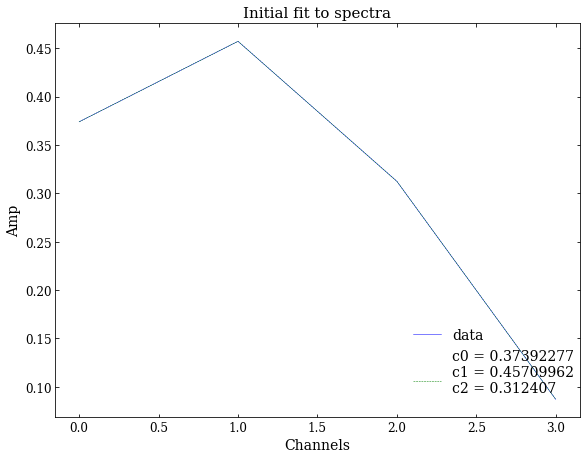

2022-06-08 08:16:16,586 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 08:16:16,593 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.37392277, 0.45709962, 0.312407, 380.3408154305203, 1249.8353297946367, 47.450213907914986, 440.7]
2022-06-08 08:16:16,681 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:16:16,686 - sgram_fit -burstfit.fit - INFO - c0: 0.38246994661065525 +- 0.03620138881361764
2022-06-08 08:16:16,690 - sgram_fit -burstfit.fit - INFO - c1: 0.4429665167754573 +- 0.029158578075088475
2022-06-08 08:16:16,695 - sgram_fit -burstfit.fit - INFO - c2: 0.29111363772944254 +- 0.029356265007328054
2022-06-08 08:16:16,699 - sgram_fit -burstfit.fit - INFO - S: 348.73878588295145 +- 8.092425797527625
2022-06-08 08:16:16,704 - sgram_fit -burstfit.fit - INFO - mu_t: 1266.3848316125302 +- 5.885421374396948
2022-06-08 08:16:16,707 - sgram_fit -burstfit.fit - INFO - sigma_t: 49.375143395526344 +- 1.58

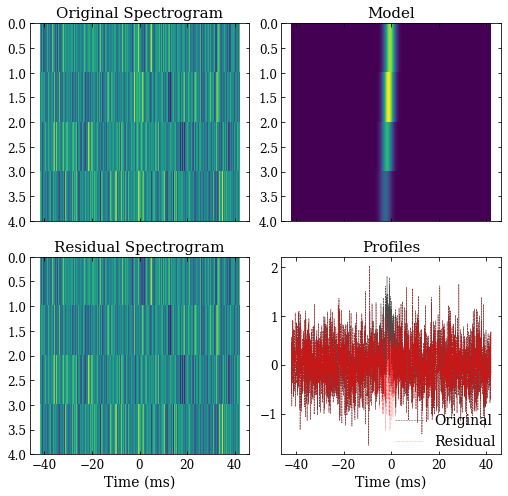

2022-06-08 08:16:17,285 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:17,287 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:16:17,290 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:16:17,292 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:16:17,294 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:17,295 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:16:17,299 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0217240519520716
2022-06-08 08:16:17,301 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-08 08:16:17,303 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-08 08:16:17,304 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-08 08:16:17,319 - initial_profile

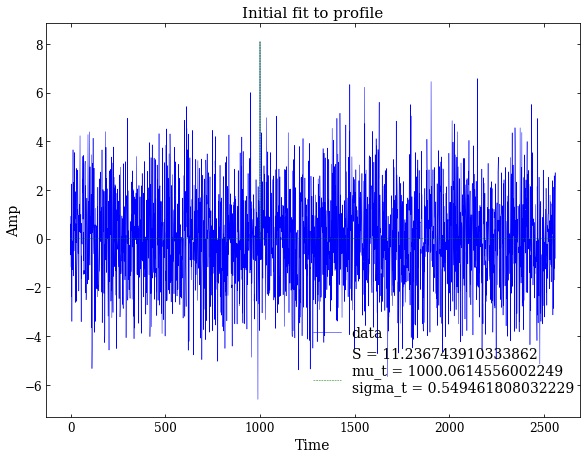

2022-06-08 08:16:17,645 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:16:17,648 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f9e1b67a400>
[0.5022731734501371 0.1730050280710892 0.44258513503124797
 0.2665465003451885]


2022-06-08 08:16:17,652 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:16:17,653 - initial_spectrafit -burstfit.fit - INFO - c0: 0.5022731734501371 +- 0.0
2022-06-08 08:16:17,655 - initial_spectrafit -burstfit.fit - INFO - c1: 0.1730050280710892 +- 0.0
2022-06-08 08:16:17,656 - initial_spectrafit -burstfit.fit - INFO - c2: 0.44258513503124797 +- 0.0


2022-06-08 08:16:17,805 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-08 08:16:17,807 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.5022731734501371, 0.1730050280710892, 0.44258513503124797, 11.236743910333862, 1000.0614556002249, 0.549461808032229, 440.7]
2022-06-08 08:16:18,031 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:16:18,036 - sgram_fit -burstfit.fit - INFO - c0: 0.34248755821790083 +- 0.11687813767861235
2022-06-08 08:16:18,039 - sgram_fit -burstfit.fit - INFO - c1: 0.35074973359232453 +- 0.10016384060804252
2022-06-08 08:16:18,043 - sgram_fit -burstfit.fit - INFO - c2: 0.3563824850812306 +- 0.10135424026556475
2022-06-08 08:16:18,047 - sgram_fit -burstfit.fit - INFO - S: 10.822954783832792 +- 1175769.35305323
2022-06-08 08:16:18,051 - sgram_fit -burstfit.fit - INFO - mu_t: 999.9709550613345 +- 0.26399224366128954
2022-06-08 08:16:18,055 - sgram_fit -burstfit.fit - INFO - sigma_t: 0

2022-06-08 08:16:18,604 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:18,606 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:16:18,610 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:16:18,613 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:16:18,615 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:18,617 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:16:18,626 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0035125370428748
2022-06-08 08:16:18,628 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 08:16:18,631 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-08 08:16:18,634 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

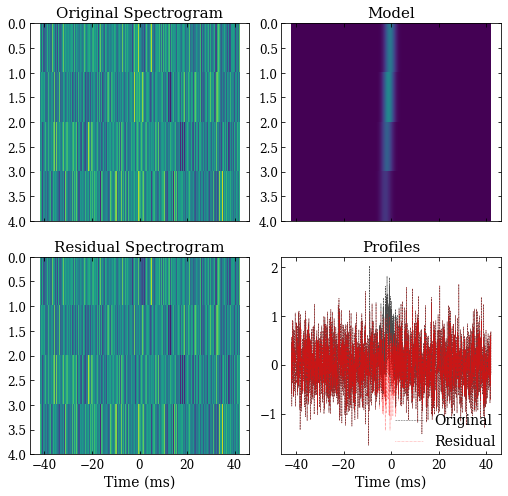

2022-06-08 08:16:19,346 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:19,347 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:16:19,351 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:16:19,353 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-08 08:16:19,354 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:19,356 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:16:19,361 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0035125370428748
2022-06-08 08:16:19,362 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:16:19,364 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:16:19,367 - tests -root - INFO - P values: T-test (0.81041), Kruskal (0.94616), KS (0.83160), F-test (0.44065)
2022-06-08 08:1

{bf}.calc_redchisq()= 1.0035125370428748


In [9]:
bf_S1T1_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 1000, 0),(np.inf, 1500, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)

### with scattering

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 08:16:38,676 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:16:38,677 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:16:38,681 - tests -root - INFO - P values: T-test (0.81041), Kruskal (0.94616), KS (0.83160), F-test (0.44065)
2022-06-08 08:16:38,682 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 08:16:38,685 - tests -root - INFO - P values: T-test (0.00002), Kruskal (0.00002), KS (0.00013), F-test (0.28142)
2022-06-08 08:16:38,687 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 08:16:38,690 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00001), KS (0.00004), F-test (0.33382)
2022-06-08 08:16:38,692 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 08:16:38,693 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 08:16:38,695 - initial_profi

2022-06-08 08:16:39,222 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:16:39,224 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f9e1b67a400>
[0.37724525 0.4587279  0.3092625  0.08677404]


2022-06-08 08:16:39,229 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:16:39,230 - initial_spectrafit -burstfit.fit - INFO - c0: 0.3772452473640442 +- 0.0
2022-06-08 08:16:39,232 - initial_spectrafit -burstfit.fit - INFO - c1: 0.4587278962135315 +- 0.0
2022-06-08 08:16:39,234 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3092625141143799 +- 0.0


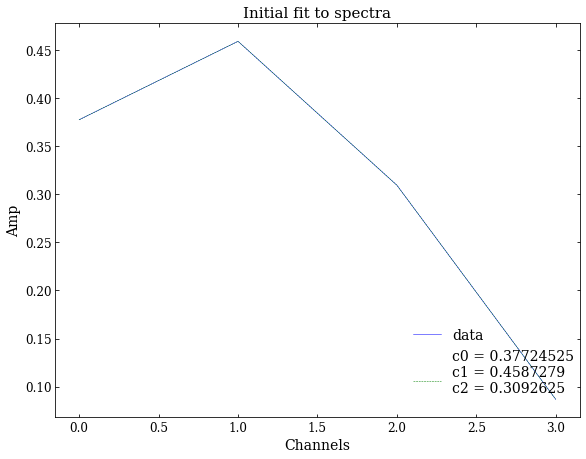

2022-06-08 08:16:39,396 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 08:16:39,397 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.37724525, 0.4587279, 0.3092625, 380.25371388816745, 1249.8356761748914, 47.44400169613742, 1.0, 440.7]
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
2022-06-08 08:16:39,527 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-08 08:16:42,894 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:16:42,901 - sgram_fit -burstfit.fit - INFO - c0: 0.3839617306716716 +- 0.03531928078079495
2022-06-08 08:16:42,903 - sgram_fit -burstfit.fit - INFO - c1: 0.4436323057786827 +- 0.028535803999152082
2022-06-08 08:16:42,905 - sgram_fit -burstfit.fit - INFO - c2: 0.2895671026643781 +- 0.02

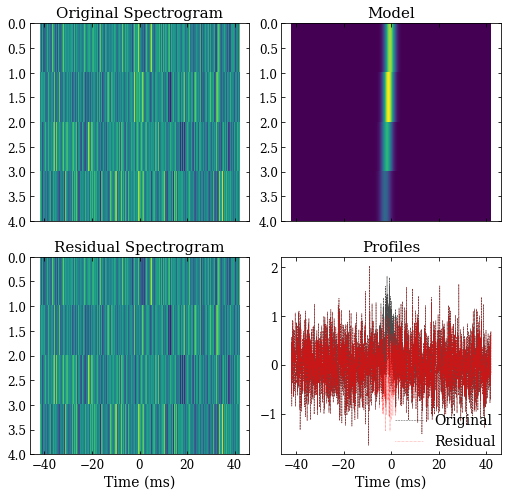

2022-06-08 08:16:43,473 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:43,475 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:16:43,478 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:16:43,480 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:16:43,481 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:16:43,483 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:16:43,487 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0251416429313007
2022-06-08 08:16:43,488 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 08:16:43,490 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-08 08:16:43,492 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 1.0251416429313007


In [10]:
bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 1000, 0, 0),(np.inf, 1500, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 08:17:39,372 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:17:39,374 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:17:39,377 - tests -root - INFO - P values: T-test (0.81041), Kruskal (0.94616), KS (0.83160), F-test (0.44065)
2022-06-08 08:17:39,378 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 08:17:39,381 - tests -root - INFO - P values: T-test (0.00002), Kruskal (0.00002), KS (0.00013), F-test (0.28142)
2022-06-08 08:17:39,383 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 08:17:39,387 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00001), KS (0.00004), F-test (0.33382)
2022-06-08 08:17:39,388 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 08:17:39,390 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 08:17:39,392 - initial_profi

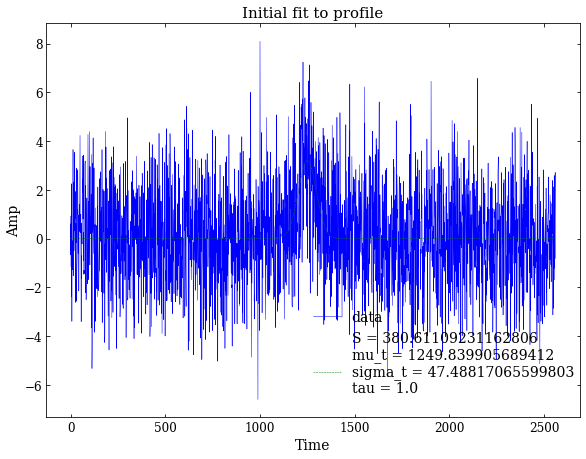

2022-06-08 08:17:39,919 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:17:39,921 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f9e1b67a400>
[0.37724525 0.4587279  0.3092625  0.08677404]


2022-06-08 08:17:39,926 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:17:39,928 - initial_spectrafit -burstfit.fit - INFO - c0: 0.3772452473640442 +- 0.0
2022-06-08 08:17:39,929 - initial_spectrafit -burstfit.fit - INFO - c1: 0.4587278962135315 +- 0.0
2022-06-08 08:17:39,931 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3092625141143799 +- 0.0


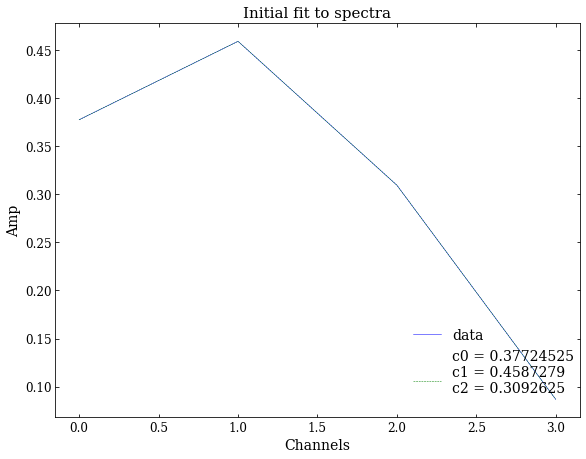

2022-06-08 08:17:40,117 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 08:17:40,119 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.37724525, 0.4587279, 0.3092625, 380.61109231162806, 1249.839905689412, 47.48817065599803, 1.0, 440.7]
2022-06-08 08:17:40,257 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-08 08:17:42,812 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:17:42,817 - sgram_fit -burstfit.fit - INFO - c0: 0.38195363475218547 +- 0.03566223778787987
2022-06-08 08:17:42,818 - sgram_fit -burstfit.fit - INFO - c1: 0.44391033288522724 +- 0.028789309826617225
2022-06-08 08:17:42,820 - sgram_fit -burstfit.fit - INFO - c2: 0.2903058466813641 +- 0.028954939455269307
2022-06-08 08:17:42,822 - sgram_fit -burstfit.fit - INFO - S: 350.1432139423466 +- 10.012618284761414
2022-06-08 08:17:42,824 - sgram_fit -burstfit.fit - INFO - mu_t: 1265

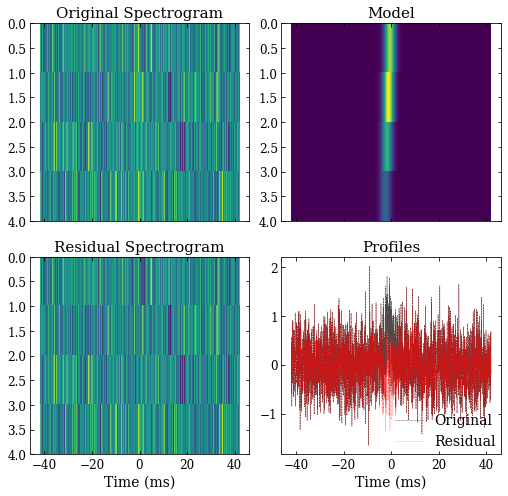

2022-06-08 08:17:43,502 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:17:43,503 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:17:43,507 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:17:43,509 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:17:43,510 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:17:43,512 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:17:43,516 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0210424978260746
2022-06-08 08:17:43,518 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-08 08:17:43,520 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-08 08:17:43,521 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-08 08:17:43,738 - initial_profile

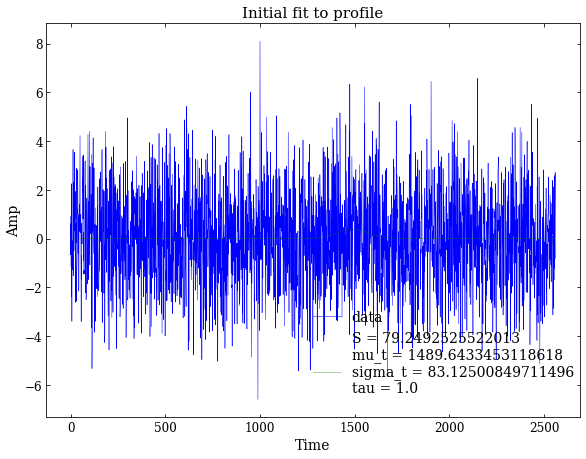

2022-06-08 08:17:44,047 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:17:44,049 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f9e1b67a400>
[0.46883830990471387 0.5496106894088507 0.13713847882505395
 0.1576633536274769]


2022-06-08 08:17:44,052 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:17:44,053 - initial_spectrafit -burstfit.fit - INFO - c0: 0.46883830990471387 +- 0.0
2022-06-08 08:17:44,054 - initial_spectrafit -burstfit.fit - INFO - c1: 0.5496106894088507 +- 0.0
2022-06-08 08:17:44,055 - initial_spectrafit -burstfit.fit - INFO - c2: 0.13713847882505395 +- 0.0


2022-06-08 08:17:44,308 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-08 08:17:44,311 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.46883830990471387, 0.5496106894088507, 0.13713847882505395, 79.2492525522013, 1489.6433453118618, 83.12500849711496, 1.0, 440.7]
2022-06-08 08:17:44,442 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-08 08:17:46,507 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:17:46,509 - sgram_fit -burstfit.fit - INFO - c0: 0.48220362748297785 +- 0.19974374798721442
2022-06-08 08:17:46,512 - sgram_fit -burstfit.fit - INFO - c1: 0.5249942755786179 +- 0.15958898256228618
2022-06-08 08:17:46,513 - sgram_fit -burstfit.fit - INFO - c2: 0.12150717921236816 +- 0.16533849448701626
2022-06-08 08:17:46,515 - sgram_fit -burstfit.fit - INFO - S: 78.3372551242429 +- 9.994966031595032
2022-06-08 08:17:46,517 - sgram_fit -burstfit.

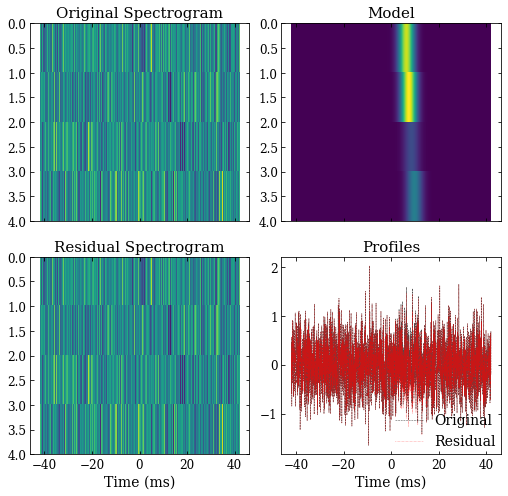

2022-06-08 08:17:47,135 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:17:47,137 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:17:47,141 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:17:47,143 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:17:47,146 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:17:47,148 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:17:47,152 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.0076636945018218
2022-06-08 08:17:47,153 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 08:17:47,155 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-08 08:17:47,156 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

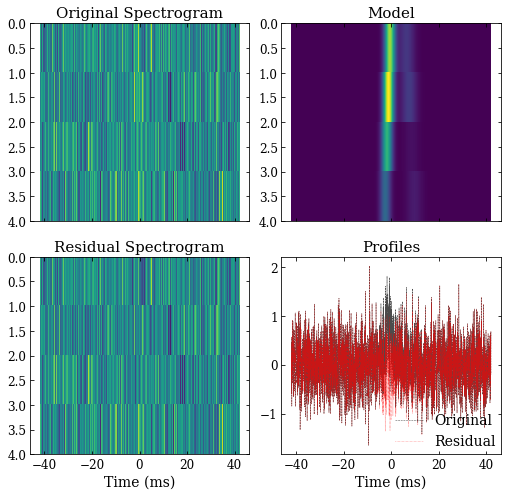

2022-06-08 08:17:50,185 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:17:50,187 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:17:50,191 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:17:50,193 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-08 08:17:50,195 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:17:50,196 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:17:50,200 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.007654567458554
2022-06-08 08:17:50,202 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:17:50,203 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:17:50,206 - tests -root - INFO - P values: T-test (0.81041), Kruskal (0.94616), KS (0.83160), F-test (0.44065)
2022-06-08 08:17

{bf}.calc_redchisq()= 1.007654567458554


In [12]:
bf_S1T2_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 1000, 0, 0),(np.inf, 1500, 10*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)


### Run MCMC after checking all curvfit results

2022-06-08 18:59:40,857 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 18:59:40,859 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [3.82469947e-01 4.42966517e-01 2.91113638e-01 3.48738786e+02
 1.26638483e+03 4.93751434e+01 4.35964534e+02]
2022-06-08 18:59:40,861 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 18:59:40,862 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 18:59:40,863 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-08 18:59:40,882 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-08 18:59:40,884 - run_mcmc -burstfit.mcmc - INFO - Priors used in MCMC are:
2022-06-08 18:59:40,886 - run_mcmc -burst

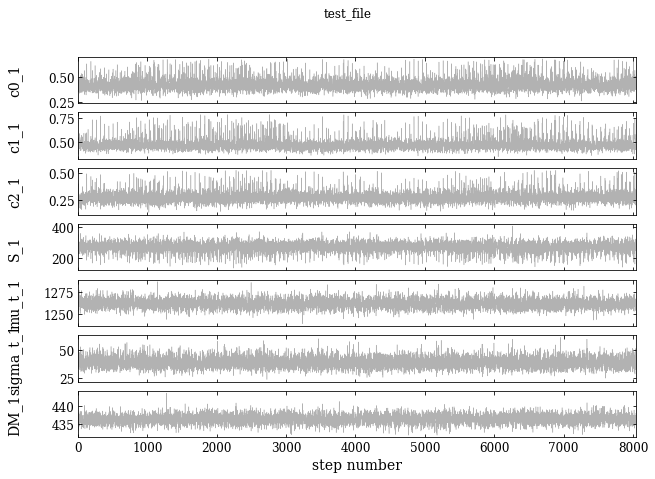

<Figure size 432x288 with 0 Axes>

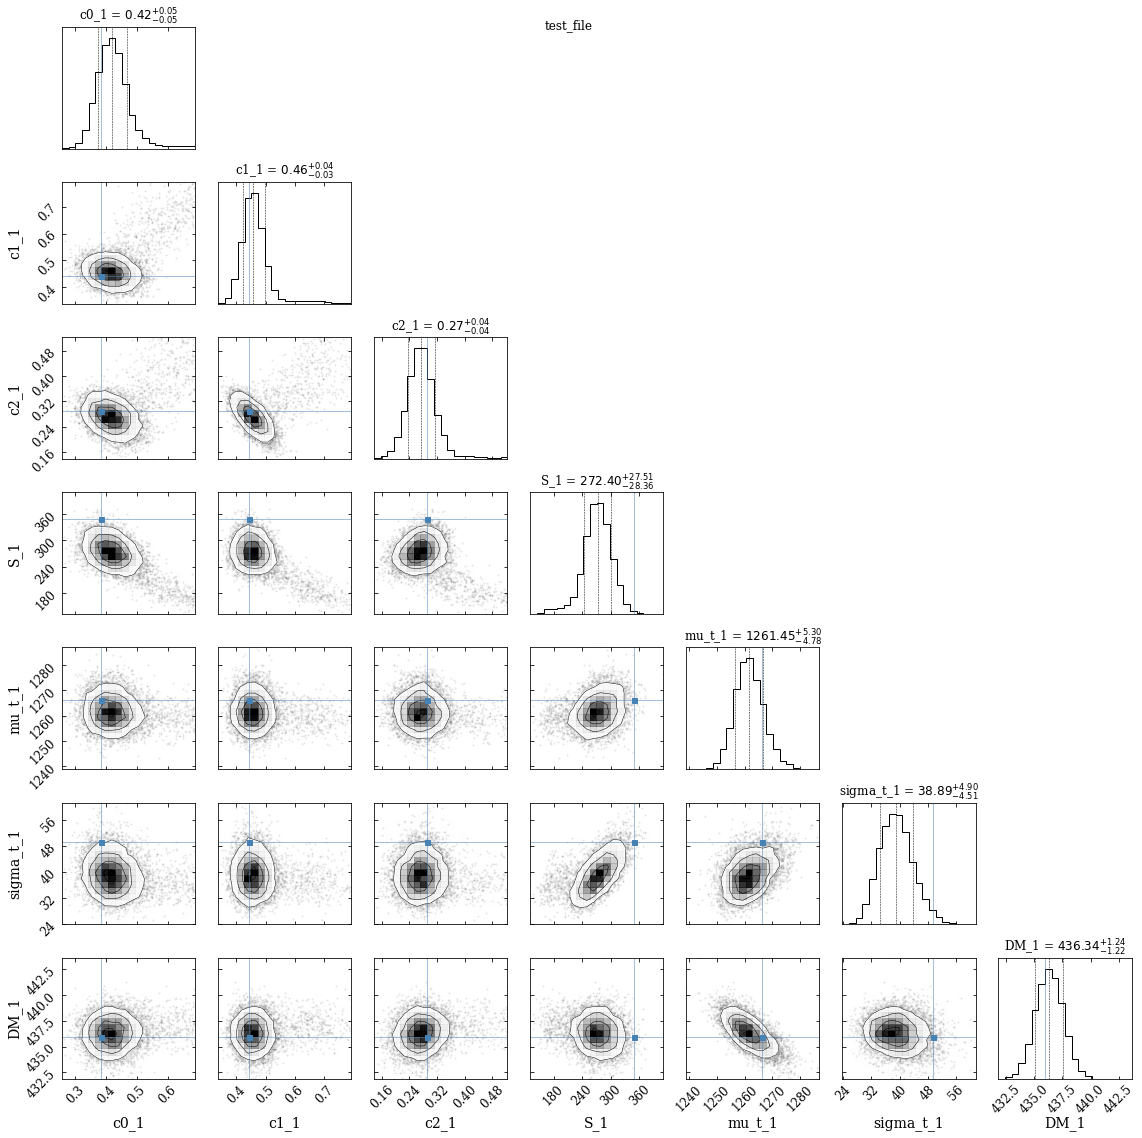

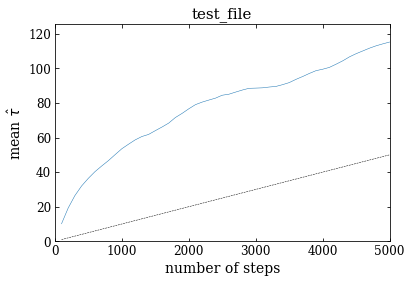

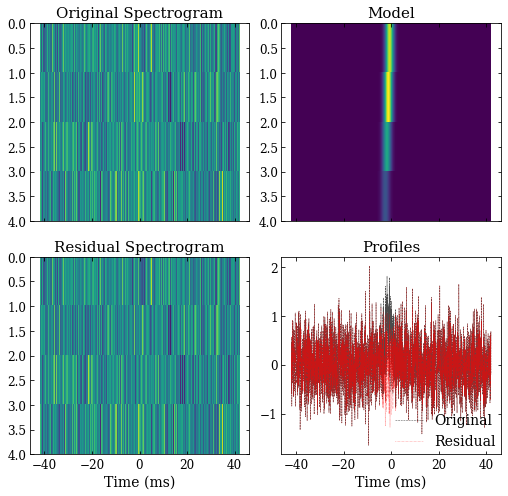

{bf}.bic =  10063.965610444151


0

In [14]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c1, mcmc=True)

2022-06-08 19:07:16,557 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 19:07:16,561 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [3.82469947e-01 4.42966517e-01 2.91113638e-01 3.48738786e+02
 1.26638483e+03 4.93751434e+01 4.35964534e+02 3.42487558e-01
 3.50749734e-01 3.56382485e-01 1.08229548e+01 9.99970955e+02
 5.47924112e-01 4.40718330e+02]
2022-06-08 19:07:16,565 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 19:07:16,569 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 19:07:16,571 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-08 19:07:16,589 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-08 19:07:1

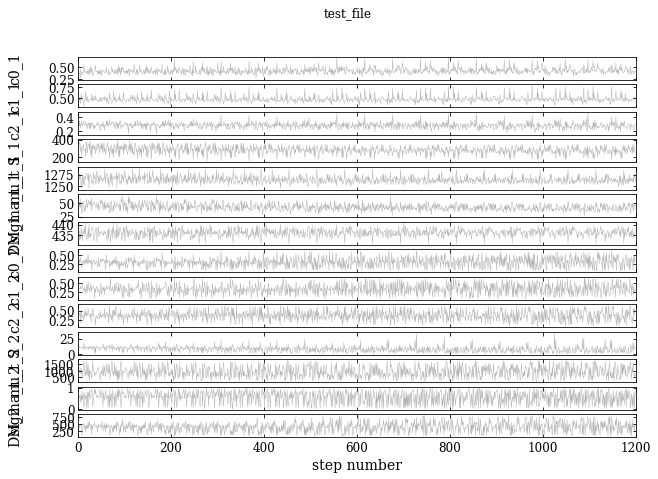

<Figure size 432x288 with 0 Axes>

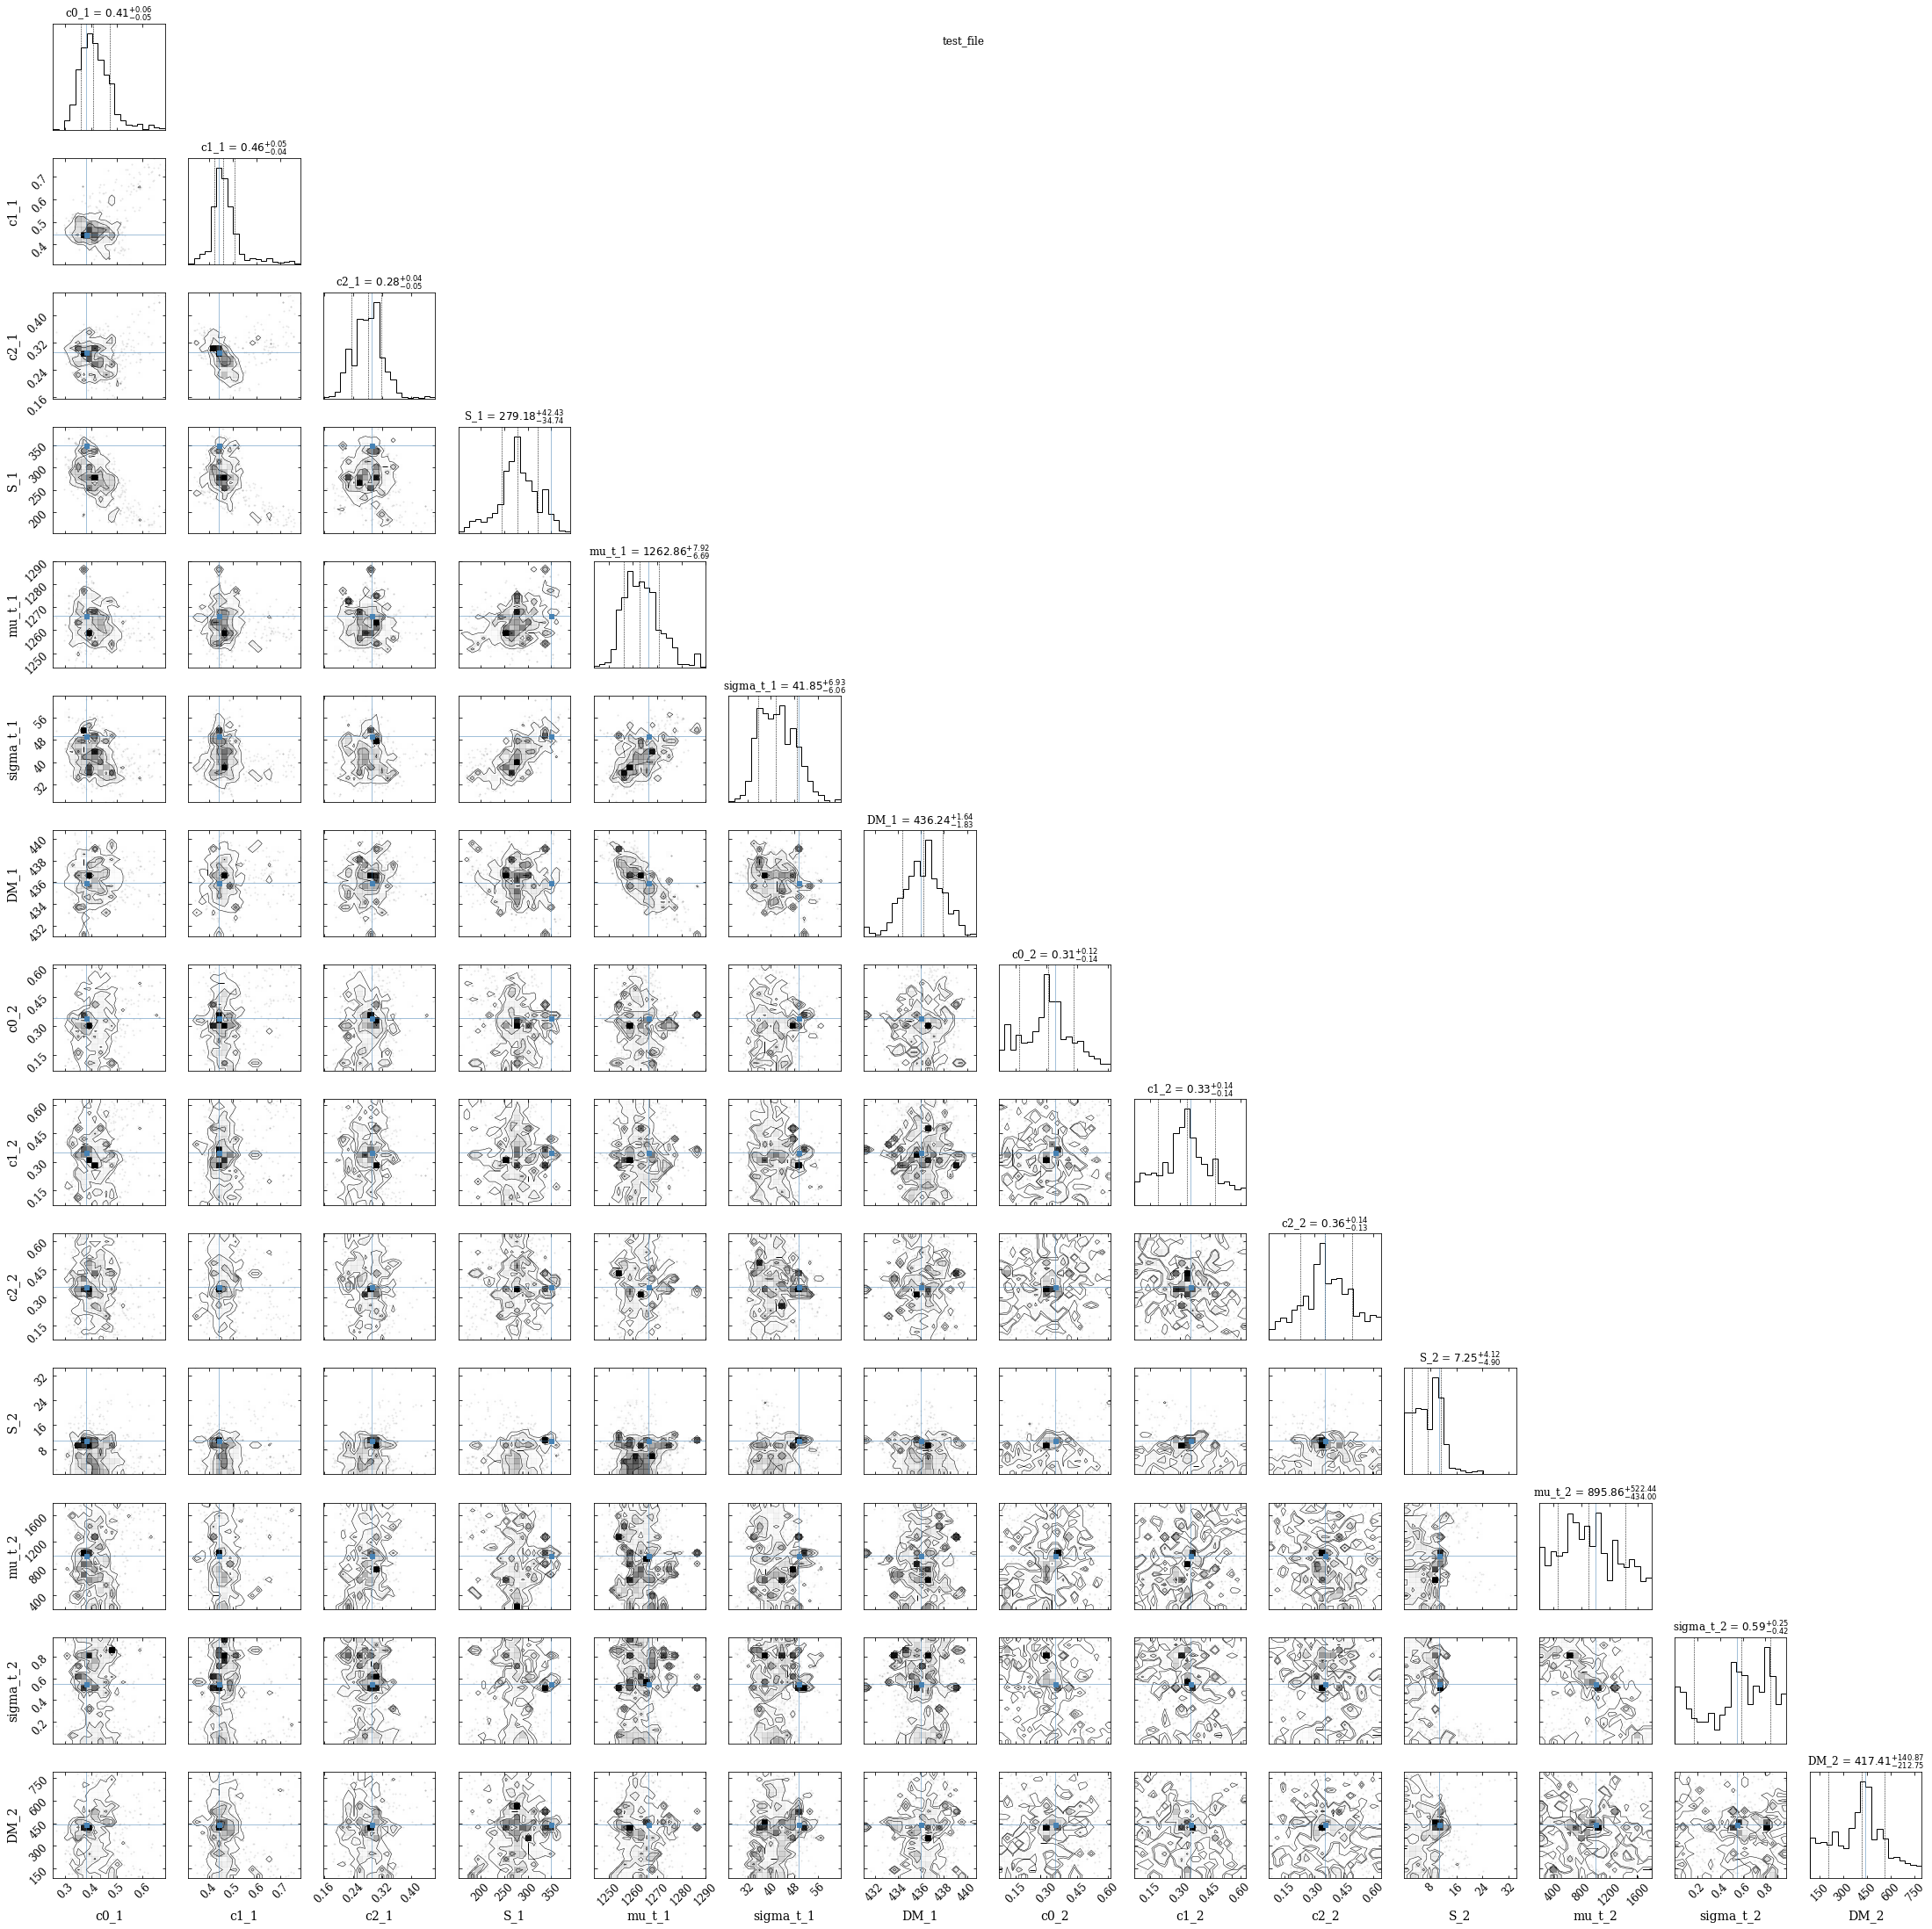

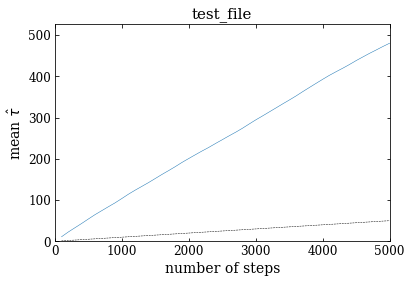

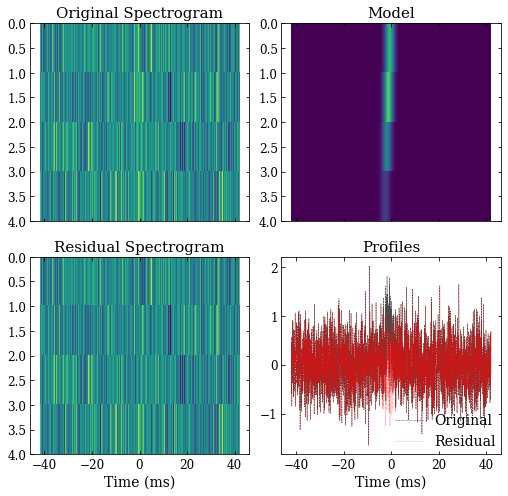

{bf}.bic =  10110.768355568158


0

In [15]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c2, mcmc=True)

2022-06-08 19:17:17,823 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 19:17:17,825 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [3.83961731e-01 4.43632306e-01 2.89567103e-01 3.47713964e+02
 1.26640406e+03 4.70340612e+01 1.00000000e+00 4.35762520e+02]
2022-06-08 19:17:17,828 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 19:17:17,830 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-08 19:17:17,832 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 19:17:17,834 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(1.8) + max_sigma_t_prior(84.66131023155047))
2022-06-08 19:17:17,836 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_pri

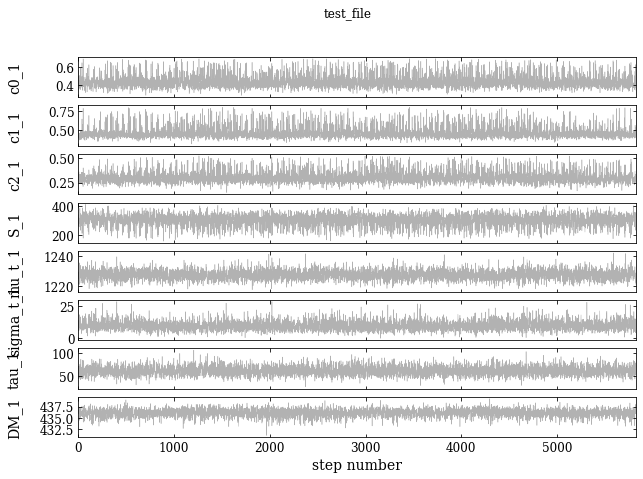

<Figure size 432x288 with 0 Axes>

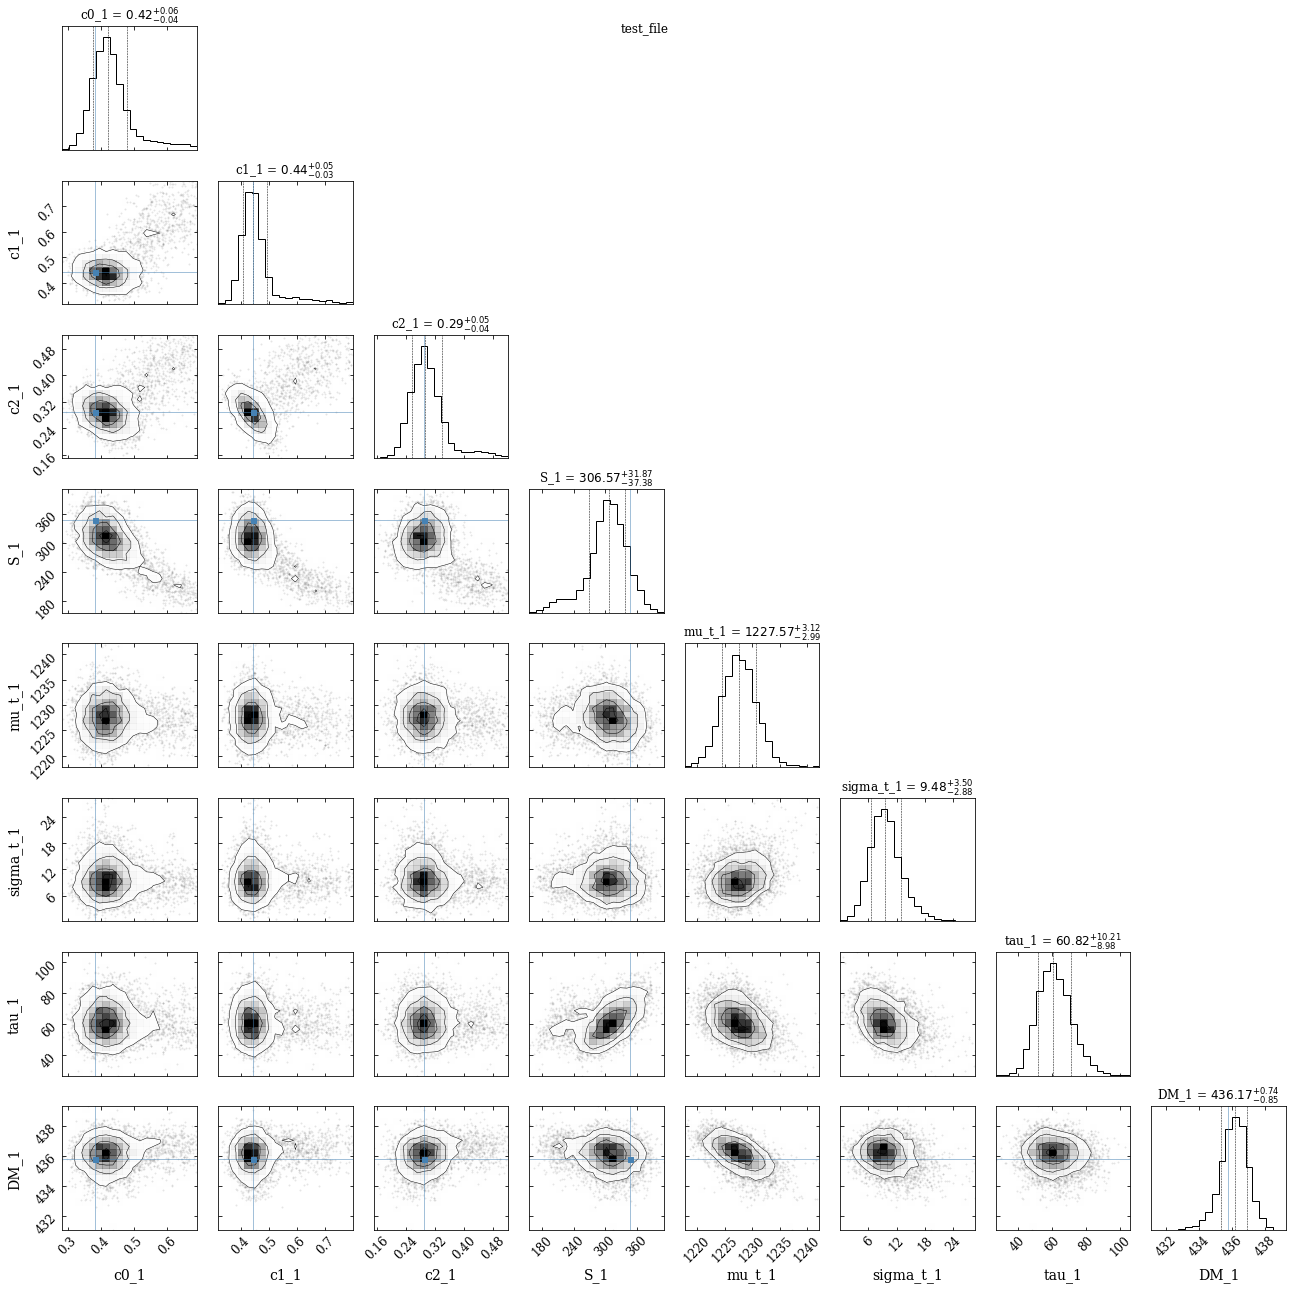

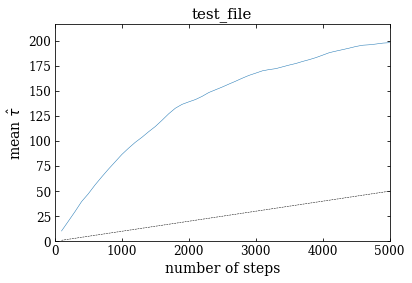

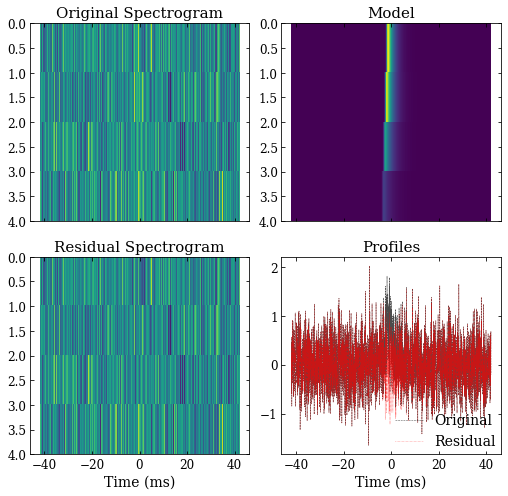

{bf}.bic =  10072.718290898209


0

In [16]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c1, mcmc=True)

2022-06-08 19:24:23,558 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 19:24:23,562 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [3.77944439e-01 4.44318274e-01 2.91438841e-01 3.49878689e+02
 1.26506123e+03 4.85984476e+01 8.02000000e-01 4.36003305e+02
 4.82677004e-01 5.24991536e-01 1.21230347e-01 7.82530909e+01
 1.47733607e+03 7.34541638e+01 1.00000000e+00 4.48993424e+02]
2022-06-08 19:24:23,566 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 19:24:23,569 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-08 19:24:23,571 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 19:24:23,572 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(1.8) + max_sigma_t_prior(132.21749483586228))
2022-06-08 19:24:23,574 - set_prior

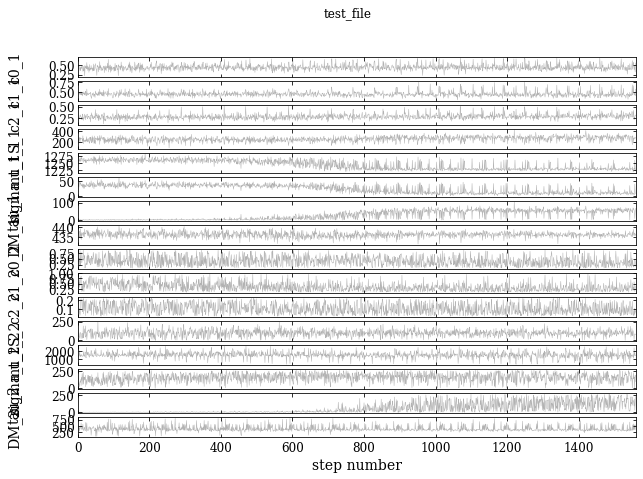

<Figure size 432x288 with 0 Axes>

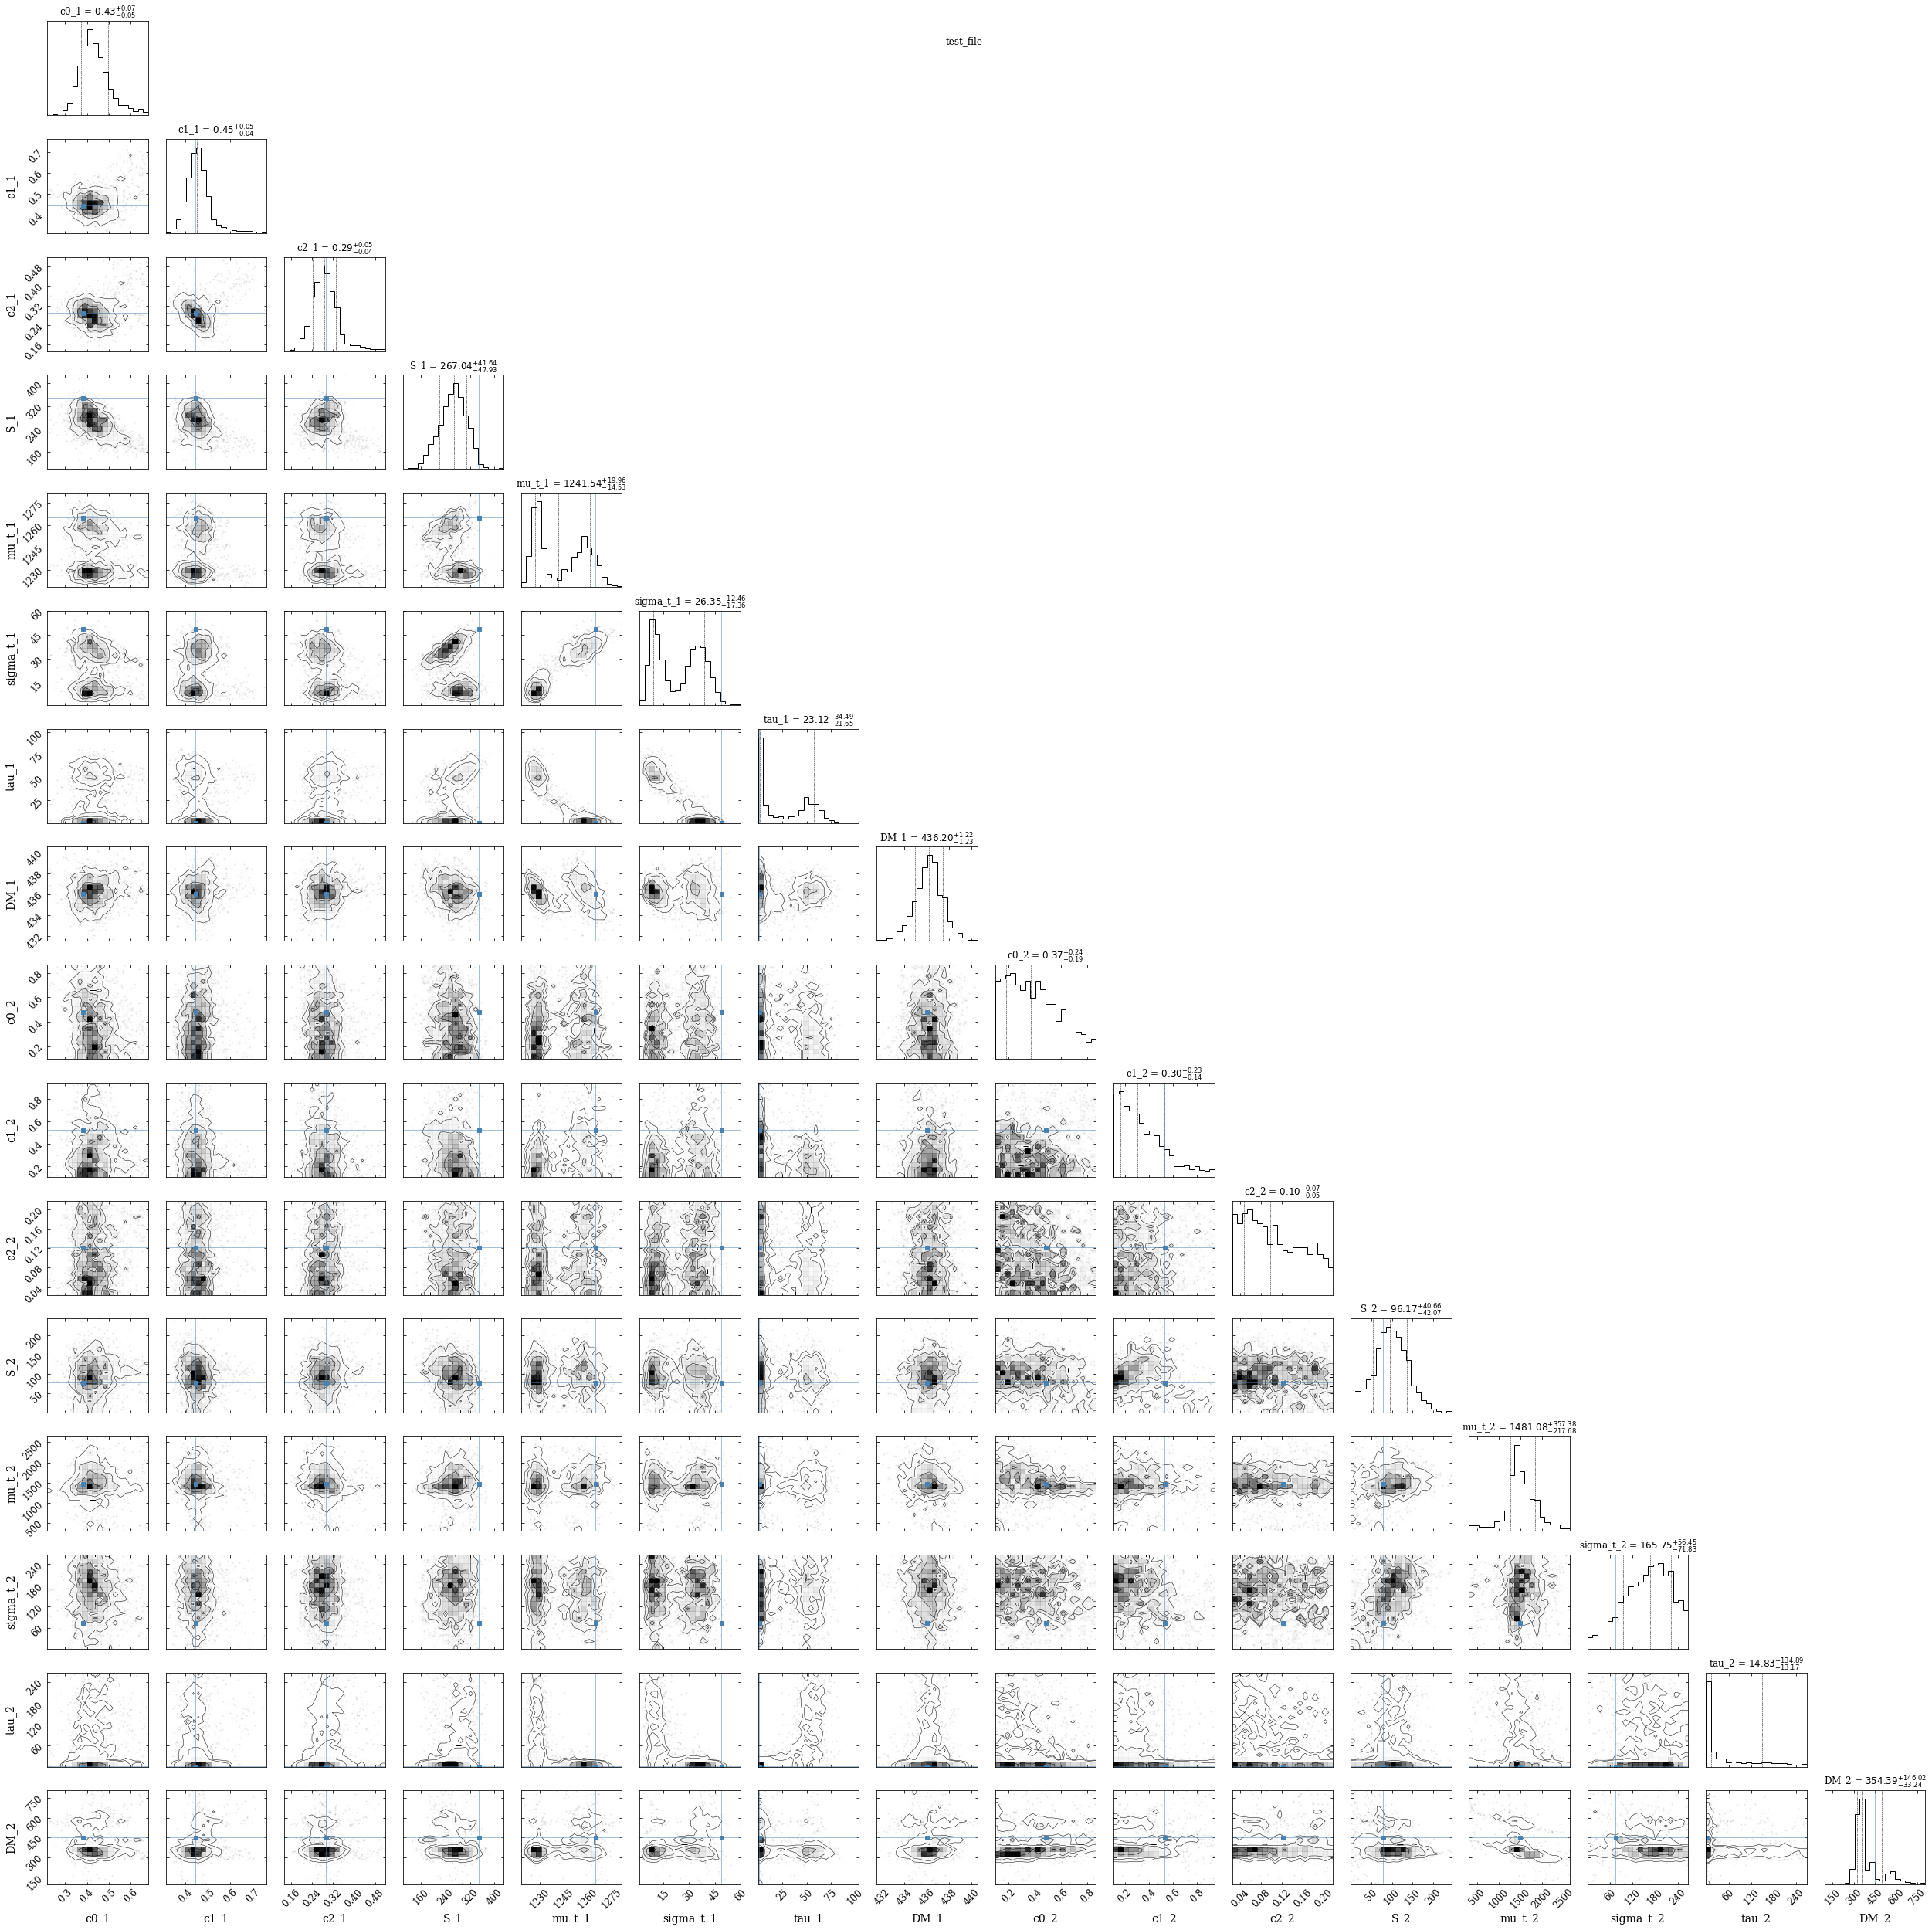

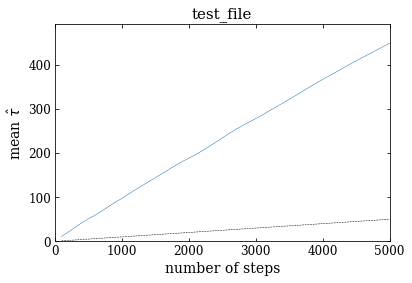

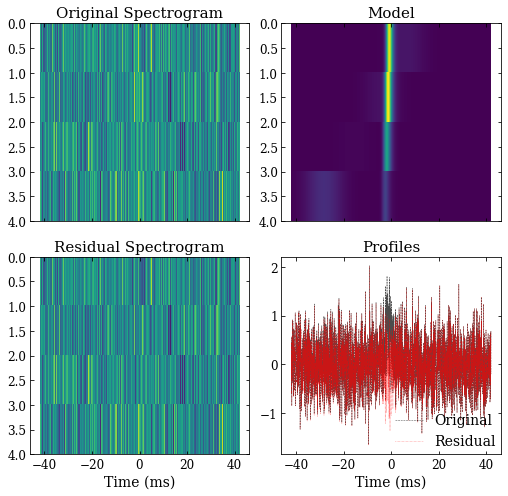

{bf}.bic =  10137.534785224965


0

In [17]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c2, mcmc=True)

### select model and save results 

In [57]:
def select_model(bf_name_list):
    bf_with_bic_list = []
    bic_list = []
    
    for name in bf_name_list:

        if name in globals() or name in locals():
            bf = globals()[name]

            if bf.bic is None: 
                print("%s.bic not found"%name)

            else:         
                bf_with_bic_list = np.append(bf_with_bic_list, name)
                bic_list = np.append(bic_list, bf.bic)
        
        else:
            print("%s not used"%name)

    sorted_bf = ([x for _,x in sorted(zip(bic_list, bf_with_bic_list))])  
    sorted_bic = sorted(bic_list)

    print(sorted_bf) 
    print(sorted_bic)
    
    return sorted_bf, sorted_bic


def save_results(file, candidate, bf_name):
    bf_best = globals()[bf_name]
    with open(file, "a") as f:
        print(candidate, file=f)
        print(bf_name, file=f)
        for ncomp in range(bf_best.ncomponents):
            for i in range(len(bf_best.param_names)):
                print("${:.4}^{{+{:.2}}}_{{-{:.2}}}$".format(bf_best.mcmc_params[ncomp + 1]['popt'][i], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][0], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][1]),
                     file=f) 
                
        print("\n", file = f)
    
    return 0



# sorted_bf, sorted_bic = paper_fit.select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])
# paper_fit.save_results(file, candidate, bf_name)

sorted_bf, sorted_bic = select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])

file = "paper_fit_result.txt"
bf_name = sorted_bf[0]
save_results(file, candidate, bf_name)

bf_S1T1_c3 not used
bf_S1T2_c3 not used
['bf_S1T1_c1', 'bf_S1T2_c1', 'bf_S1T1_c2', 'bf_S1T2_c2']
[10063.965610444151, 10072.718290898209, 10110.768355568158, 10137.534785224965]


In [56]:
np.shape(data_burst)

(4, 2560)